# Steam Game Popularity vs Platform Support

by Lawrence Menefee

## Introduction

As both gaming console technology and video game graphics have improved over time, generational differences in this hardware and software performance are becoming less and less noticable. With the launches of the the Playstation 5 and the Xbox Series X/S, many consumers have begun to notice that the "next gen" games feel quite similar to the "last gen" games. With Microsoft and Sony now supporting backwards compatability for their consoles, the need for a new console every ~6 years begins to come into question. With consoles prices from 300 to 500 dollars, it becomes hard to imagine what the next generation console can add to be worth such an investment.

Nintendo has cemented itself as the master of the console exclusive - if you want to play a Nintento game, you have to have the Nintendo console that game was made for. However, Sony and Microsoft have not done the same. Aside from a small number of console exclusives, if you want to play the newest non-Nintendo video games, you probably don't need to buy the newest Playstation or Xbox to do so. The big name games of the year are often both the ones requiring the highest power hardware and the ones which are console exclusive. However, game developers are losing incentive to make their games console exclusives. Over the past few years, game revenue for PC vs console has been just about [equal](https://www.wepc.com/statistics/pc-gaming/). Although these two audiences are non-exclusive, having a game listed on both PC and console gives game developers a significantly larger audience. Most consoles now support cross-saves so a player can own a game on both PC and console and move between the same save file on both, enticing even the cross-section between the PC and console crowds to make multiple game purchases. Unless console producers shell out large ammounts of money to lock down a significant number of console exclusive games, it seems as if the future is shifting towards PC gaming.

Over the last 8 years, the worldwide gaming market value has [more than doubled](https://www.statista.com/statistics/292056/video-game-market-value-worldwide). Around half of all gaming revenue comes from mobile games, with console and PC games splitting the other half. Apple, looking for the largest slice of the pie, is investing greatly in mobile gaming. Consequently, Apple has not vested any interest in the PC gaming space recently. In fact, PC gaming has become almost synonomous with Windows gaming.  Steam, the largest distributer of PC games, owns 50-70% of the market for downloadable PC games. According to the [Steam Hardware and Software Survey](https://store.steampowered.com/hwsurvey/Steam-Hardware-Software-Survey-Welcome-to-Steam?platform=combined), only 3.37% of Steam users are also MacOS users as of November 2020. As a member of this minority, I have found it increasingly difficult to play even the simplest of PC games on my Mac, as Apple dropped support for 32-bit apps with the release of MacOS Catalina. Most PC games available for MacOS are ports of Windows versions of the games, and these seem to be few and far between. As PC gaming becomes more and more popular, many new consumers may begin to lean towards a Windows machine when it comes to picking a laptop or new PC. In this project, I want to explore data from Steam to see if MacOS support is really dissapearing from PC gaming completely.

## Data Collection

Data for this project comes from two places. [SteamSpy](https://steamspy.com) provides user based Steam Data via its [API](https://steamspy.com/api.php). Steam has its own [API](https://steamcommunity.com/dev) which is not very user-friendly. I reccomend using other Steam API tools like [steamapis](https://steamapis.com) if you wish to replicate this project. I have commented out most of my data collection code, but I have left it here for reference. The resultant files (ssdata_8pages.json and steam_data.json) are included in this project. Code to read from these files is included below.

In [1]:
# requesting data from steamspy API 
import requests
import json
import pandas as pd
import numpy as np
import re
import os

In [50]:
#each page contains 1000 games, sorted by estimated number of total owners
"""
url = 'https://steamspy.com/api.php'
ss_request_data1 = requests.get(url, {"request": "all","page":"1"}) #,proxies = proxies)
ss_request_data2 = requests.get(url, {"request": "all","page":"2"}) #,proxies = proxies)
ss_request_data3 = requests.get(url, {"request": "all","page":"3"}) #,proxies = proxies)
ss_request_data4 = requests.get(url, {"request": "all","page":"4"}) #,proxies = proxies)
ss_request_data5 = requests.get(url, {"request": "all","page":"5"}) #,proxies = proxies)
ss_request_data6 = requests.get(url, {"request": "all","page":"6"}) #,proxies = proxies)
ss_request_data7 = requests.get(url, {"request": "all","page":"7"}) #,proxies = proxies)
ss_request_data8 = requests.get(url, {"request": "all","page":"8"}) #,proxies = proxies)
ss_request_data9 = requests.get(url, {"request": "all","page":"9"}) #,proxies = proxies)
ss_request_data10 = requests.get(url, {"request": "all","page":"10"}) #,proxies = proxies)
"""
url = 'https://steamspy.com/api.php' #single request for front page
ss_request_data0 = requests.get(url, {"request": "all"})
ss_content0 = json.loads(ss_request_data0.text)
steamspy_df0 = pd.DataFrame.from_dict(ss_content0,orient='index')
steamspy_df0.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1201694,220347,0,"100,000,000 .. 200,000,000",35960,1621,1331,886,0,0,0,557834
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,4481428,608354,0,"100,000,000 .. 200,000,000",26745,950,6673,467,0,0,0,934139
440,440,Team Fortress 2,Valve,Valve,,692628,43332,0,"50,000,000 .. 100,000,000",9068,1044,381,181,0,0,0,84011
578080,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,872469,746798,0,"50,000,000 .. 100,000,000",25297,609,11694,264,2999,2999,0,350993
230410,230410,Warframe,Digital Extremes,Digital Extremes,,362476,37084,0,"20,000,000 .. 50,000,000",8506,421,343,266,0,0,0,43725


In [112]:
# creating pandas dataframe of steamspy data
"""
ss_content1 = json.loads(ss_request_data1.text)
ss_content2 = json.loads(ss_request_data2.text)
ss_content3 = json.loads(ss_request_data3.text)
ss_content4 = json.loads(ss_request_data4.text)
ss_content5 = json.loads(ss_request_data5.text)
ss_content6 = json.loads(ss_request_data6.text)
ss_content7 = json.loads(ss_request_data7.text)
ss_content8 = json.loads(ss_request_data8.text)
ss_content9 = json.loads(ss_request_data9.text)
ss_content10 = json.loads(ss_request_data10.text)
steamspy_df1 = pd.DataFrame.from_dict(ss_content1,orient='index')
steamspy_df2 = pd.DataFrame.from_dict(ss_content2,orient='index')
steamspy_df3 = pd.DataFrame.from_dict(ss_content3,orient='index')
steamspy_df4 = pd.DataFrame.from_dict(ss_content4,orient='index')
steamspy_df5 = pd.DataFrame.from_dict(ss_content5,orient='index')
steamspy_df6 = pd.DataFrame.from_dict(ss_content6,orient='index')
steamspy_df7 = pd.DataFrame.from_dict(ss_content7,orient='index')
steamspy_df8 = pd.DataFrame.from_dict(ss_content8,orient='index')
steamspy_df9 = pd.DataFrame.from_dict(ss_content9,orient='index')
steamspy_df10 = pd.DataFrame.from_dict(ss_content10,orient='index')
steamspy_df = steamspy_df1.append(steamspy_df2).append(steamspy_df3).append(steamspy_df4).append(steamspy_df5).append(steamspy_df6).append(steamspy_df7).append(steamspy_df8).append(steamspy_df9).append(steamspy_df10)
"""
#creating steamspy dataframe from ssdata_8pages.json
path = os.path.dirname(os.path.abspath('ssdata_8pages.json'))
f = open(path+'/ssdata_8pages.json', "r", encoding="utf8")
f_txt = f.read()
f_list = re.findall(r"\{\".+?\}{2}", f_txt,re.DOTALL)
steamspy_df = pd.DataFrame()
for x in f_list:
    steamspy_df = steamspy_df.append(pd.DataFrame.from_dict(json.loads(x)).transpose())
steamspy_df = steamspy_df0.append(steamspy_df) #including front page from single request
steamspy_df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1201694,220347,0,"100,000,000 .. 200,000,000",35960,1621,1331,886,0,0,0,557834
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,4481428,608354,0,"100,000,000 .. 200,000,000",26745,950,6673,467,0,0,0,934139
440,440,Team Fortress 2,Valve,Valve,,692628,43332,0,"50,000,000 .. 100,000,000",9068,1044,381,181,0,0,0,84011
578080,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,872469,746798,0,"50,000,000 .. 100,000,000",25297,609,11694,264,2999,2999,0,350993
230410,230410,Warframe,Digital Extremes,Digital Extremes,,362476,37084,0,"20,000,000 .. 50,000,000",8506,421,343,266,0,0,0,43725


In [113]:
#saving steamspy data
"""
f = open("ssdata_8pages.json","w+")
f.write(ss_request_data1.text)
f.write(ss_request_data2.text)
f.write(ss_request_data3.text)
f.write(ss_request_data4.text)
f.write(ss_request_data5.text)
f.write(ss_request_data6.text)
f.write(ss_request_data7.text)
f.write(ss_request_data8.text)
f.write(ss_request_data9.text)
f.write(ss_request_data10.text)
f.close()
"""

print(len(steamspy_df))

9000


I was able to obtain data on 9000 games from steamspy.

In [114]:
# this code can be used to scrape data from the steam API
# It has been commented out and the resultant file has been included instead

"""
#getting game info from Steam API
steam_df = pd.DataFrame(columns = ['type', 'name', 'steam_appid', 'required_age', 'is_free', 'dlc',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'reviews', 'header_image', 'website',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'packages', 'package_groups', 'platforms',
       'metacritic', 'categories', 'genres', 'screenshots', 'movies',
       'recommendations', 'release_date', 'support_info', 'background',
       'content_descriptors'])
i = 0
f = open("steam_data.json","w+")
f.write('[')

#requesting data for each key in steamspy dataset
for id in steamspy_df['appid'].values:
    url = 'http://store.steampowered.com/api/appdetails/?appids='+str(id)
    #requesting data from Steam API
    s_request_data = requests.get(url)#,proxies=proxies) 
    if s_request_data != None:
        s_content = s_request_data.json()
        #creating DataFrame
        if s_content != None: 
            try:
                steam_df = steam_df.append(pd.DataFrame.from_dict(s_content[str(id)]['data'],orient='index').transpose())
                write to file
                f.write(s_request_data.text)
                f.write(',')
            except KeyError:
                pass
#f.write(']')
#f.close()
steam_df.head()
"""
print()


In [409]:
#requesting page 0 data from steam
steam_df0 = pd.DataFrame(columns = ['type', 'name', 'steam_appid', 'required_age', 'is_free', 'dlc',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'reviews', 'header_image', 'website',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'packages', 'package_groups', 'platforms',
       'metacritic', 'categories', 'genres', 'screenshots', 'movies',
       'recommendations', 'release_date', 'support_info', 'background',
       'content_descriptors'])

f = open("steam_data_p0.json","w+")
f.write('[')
for id in steamspy_df0['appid'].values:
    url = 'http://store.steampowered.com/api/appdetails/?appids='+str(id)
    #requesting data from Steam API
    s_request_data = requests.get(url) 
    if s_request_data != None:
        s_content = s_request_data.json()
        #creating DataFrame
        if s_content != None: 
            try:
                steam_df0 = steam_df0.append(pd.DataFrame.from_dict(s_content[str(id)]['data'],orient='index').transpose())
                #write to file
                f.write(s_request_data.text)
                f.write(',')
            except KeyError:
                pass
f.write(']')
f.close()
steam_df0.head()

,type,name,steam_appid,required_age,is_free,dlc,detailed_description,about_the_game,short_description,supported_languages,...,support_info,background,content_descriptors,controller_support,achievements,legal_notice,price_overview,ext_user_account_notice,demos,drm_notice
0,game,Dota 2,570,0,True,"[1241930, 652720]",<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...","Bulgarian, Czech, Danish, Dutch, English<stron...",...,"{'url': 'http://dev.dota2.com/', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/570...,"{'ids': [], 'notes': None}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,game,Counter-Strike: Global Offensive,730,0,True,[1490530],"<h1>Niedawno zaktualizowano</h1><p><a href=""ht...",Counter-Strike: Global Offensive (CS: GO) posz...,Counter-Strike: Global Offensive (CS: GO) posz...,"Czeski, Duński, Holenderski, Angielski<strong>...",...,"{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/730...,"{'ids': [2, 5], 'notes': 'Includes intense vio...",full,"{'total': 167, 'highlighted': [{'name': 'Ktoś ...",NaN,NaN,NaN,NaN,NaN
0,game,Team Fortress 2,440,0,True,[629330],"<p><strong>""The most fun you can have online""<...","<p><strong>""The most fun you can have online""<...",Nine distinct classes provide a broad range of...,"English<strong>*</strong>, Danish, Dutch, Finn...",...,"{'url': 'http://steamcommunity.com/app/440', '...",https://steamcdn-a.akamaihd.net/steam/apps/440...,"{'ids': [2, 5], 'notes': 'Includes cartoon vio...",NaN,"{'total': 520, 'highlighted': [{'name': 'Head ...",NaN,NaN,NaN,NaN,NaN
0,game,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,0,False,[1477540],<strong>PLAYERUNKNOWN'S BATTLEGROUNDS</strong>...,<strong>PLAYERUNKNOWN'S BATTLEGROUNDS</strong>...,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Englisch, Koreanisch, Vereinfachtes Chinesisch...",...,{'url': 'https://support.playbattlegrounds.com...,https://steamcdn-a.akamaihd.net/steam/apps/578...,"{'ids': [2, 5], 'notes': None}",NaN,"{'total': 37, 'highlighted': [{'name': 'Letzte...","© 2017 KRAFTON, Inc.<br />\r\nPLAYERUNKNOWN'S ...","{'currency': 'EUR', 'initial': 2999, 'final': ...",NaN,NaN,NaN
0,game,Warframe,230410,17,True,"[1390110, 1390130, 1390131, 1390132, 1442700, ...","<h1>Operation: Orphix Venom</h1><p><img src=""h...","<img src=""https://steamcdn-a.akamaihd.net/stea...",Warframe is a cooperative free-to-play third p...,"English<strong>*</strong>, German, French, Ita...",...,"{'url': 'http://support.warframe.com/', 'email...",https://steamcdn-a.akamaihd.net/steam/apps/230...,"{'ids': [2, 5], 'notes': None}",NaN,"{'total': 193, 'highlighted': [{'name': 'We Sh...",Warframe and the Warframe logo are registered ...,NaN,Warframe Account,NaN,NaN


Due to some HTTPS connection errors, the scrape was not complete. A large amount of data was still able to be obtained. Each dictionary entry was not separated into a separate list entry, so that is done below. The correct lines have been added as comments to the above block to do this list separation as a part of the scrape if the scrape was repeated. Due to the large amount of data being requested, it is unreasonable to repeat the scrape at this time.

In [115]:
#seeing how many data points were successfully obtained
path = os.path.dirname(os.path.abspath('steam_data.json'))
f = open(path+'/steam_data.json', "r", encoding="utf8")
f_txt = f.read()
f_list = re.findall(r"{\"success\":true,\"data\":.+?\}{3}", f_txt)
len(f_list)

3448

I ran a smaller batch of requests to try to obtain just the page 0 data to ensure that I at least have that, as it seems a lot of it was lost in the first large scrape. Appending that to steam_df below.

In [575]:
"""
path = os.path.dirname(os.path.abspath('steam_data_p0.json'))
f = open(path+'steam_data_p0.json', "r", encoding="utf8")
steam_df0 = pd.read_json(f,orient='index')
steam_df0.head() 
"""
print()

We have gotten 3448 good results from the initial scrape.

In [414]:
import ast
#creating dataframe
steam_df2 = pd.DataFrame(columns = ['type', 'name', 'steam_appid', 'required_age', 'is_free', 'dlc',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'reviews', 'header_image', 'website',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'packages', 'package_groups', 'platforms',
       'metacritic', 'categories', 'genres', 'screenshots', 'movies',
       'recommendations', 'release_date', 'support_info', 'background',
       'content_descriptors', 'controller_support', 'achievements',
       'legal_notice', 'price_overview', 'ext_user_account_notice', 'demos',
       'drm_notice'])
for x in f_list:
    steam_df2 = steam_df2.append(pd.DataFrame.from_dict(json.loads(x)['data'],orient='index').transpose())
#Combining page 0 data with the rest of the obtained data:
steam_df2 = steam_df2.append(steam_df0)
steam_df2.head()

,type,name,steam_appid,required_age,is_free,dlc,detailed_description,about_the_game,short_description,supported_languages,...,support_info,background,content_descriptors,controller_support,achievements,legal_notice,price_overview,ext_user_account_notice,demos,drm_notice
0,game,The Swapper,231160,0,False,NaN,What if someone knew your mind better than you...,What if someone knew your mind better than you...,What if someone knew your mind better than you...,English<strong>*</strong><br><strong>*</strong...,...,{'url': 'http://steamcommunity.com/app/231160'...,https://steamcdn-a.akamaihd.net/steam/apps/231...,"{'ids': [], 'notes': None}",full,"{'total': 10, 'highlighted': [{'name': 'I', 'p...",NaN,"{'currency': 'USD', 'initial': 1499, 'final': ...",NaN,NaN,NaN
0,game,Machinarium,40700,0,False,NaN,<strong>The definitive version of Machinarium ...,<strong>The definitive version of Machinarium ...,Machinarium is the award-winning independent a...,"English<strong>*</strong>, French<strong>*</st...",...,{'url': 'http://amanita-design.net/contact.htm...,https://steamcdn-a.akamaihd.net/steam/apps/407...,"{'ids': [], 'notes': None}",full,"{'total': 12, 'highlighted': [{'name': 'SURVIV...",NaN,"{'currency': 'USD', 'initial': 1499, 'final': ...",NaN,"[{'appid': 40710, 'description': ''}]",NaN
0,game,Villagers and Heroes,263540,0,True,NaN,Join hundreds of thousands of players worldwid...,Join hundreds of thousands of players worldwid...,Welcome to a land you'll never want to leave! ...,"English, German, Portuguese, French, Italian, ...",...,{'url': 'http://www.villagersandheroes.com/con...,https://steamcdn-a.akamaihd.net/steam/apps/263...,"{'ids': [], 'notes': None}",NaN,NaN,Villagers and Heroes and Mad Otter Games are t...,NaN,NaN,NaN,NaN
0,game,Codename CURE,355180,0,True,NaN,<h1>Workshop</h1><p>CURE now includes Steam Wo...,"Codename CURE is a first person, co-operative ...","Codename CURE is a first person, co-operative ...","English, German, French, Spanish - Spain, Russ...",...,{'url': 'http://steamcommunity.com/groups/code...,https://steamcdn-a.akamaihd.net/steam/apps/355...,"{'ids': [], 'notes': None}",NaN,"{'total': 40, 'highlighted': [{'name': 'Lieute...",NaN,NaN,NaN,NaN,NaN
0,game,RoBoRumble,420970,0,False,NaN,<strong>RoBoRumble</strong> is a real-time 3D ...,<strong>RoBoRumble</strong> is a real-time 3D ...,Build powerful battle robots from components l...,"English<strong>*</strong>, German<strong>*</st...",...,"{'url': '', 'email': 'support@topware.com'}",https://steamcdn-a.akamaihd.net/steam/apps/420...,"{'ids': [], 'notes': None}",NaN,NaN,© 1998 - 2018 by AC Enterprises eK. Published ...,"{'currency': 'USD', 'initial': 599, 'final': 1...",NaN,NaN,NaN


In [421]:
# changing column names to match steamspy data for merge
steam_df2.columns = ['type', 'name', 'appid', 'required_age', 'is_free', 'dlc',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'reviews', 'header_image', 'website',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'packages', 'package_groups', 'platforms',
       'metacritic', 'categories', 'genres', 'screenshots', 'movies',
       'recommendations', 'release_date', 'support_info', 'background',
       'content_descriptors', 'controller_support', 'achievements',
       'legal_notice', 'price_overview', 'ext_user_account_notice', 'demos',
       'drm_notice']
master_df = steam_df2.merge(steamspy_df,on=['appid','name'])
master_df.head()

,type,name,appid,required_age,is_free,dlc,detailed_description,about_the_game,short_description,supported_languages,...,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,game,The Swapper,231160,0,False,NaN,What if someone knew your mind better than you...,What if someone knew your mind better than you...,What if someone knew your mind better than you...,English<strong>*</strong><br><strong>*</strong...,...,0,"500,000 .. 1,000,000",214,0,241,0,1499,1499,0,6
1,game,Machinarium,40700,0,False,NaN,<strong>The definitive version of Machinarium ...,<strong>The definitive version of Machinarium ...,Machinarium is the award-winning independent a...,"English<strong>*</strong>, French<strong>*</st...",...,0,"500,000 .. 1,000,000",244,0,277,0,1499,1499,0,43
2,game,Villagers and Heroes,263540,0,True,NaN,Join hundreds of thousands of players worldwid...,Join hundreds of thousands of players worldwid...,Welcome to a land you'll never want to leave! ...,"English, German, Portuguese, French, Italian, ...",...,0,"500,000 .. 1,000,000",141,0,85,0,0,0,0,61
3,game,Codename CURE,355180,0,True,NaN,<h1>Workshop</h1><p>CURE now includes Steam Wo...,"Codename CURE is a first person, co-operative ...","Codename CURE is a first person, co-operative ...","English, German, French, Spanish - Spain, Russ...",...,0,"500,000 .. 1,000,000",484,0,37,0,0,0,0,37
4,game,RoBoRumble,420970,0,False,NaN,<strong>RoBoRumble</strong> is a real-time 3D ...,<strong>RoBoRumble</strong> is a real-time 3D ...,Build powerful battle robots from components l...,"English<strong>*</strong>, German<strong>*</st...",...,0,"500,000 .. 1,000,000",927,0,365,0,179,599,70,2


In [422]:
len(master_df)

3598

After scraping the data from both sources and merging the two DataFrames, we have 3598 consistent data points.

## Data Cleaning

In this project I am only trying to analyze certain aspects of these games in relation to platform, so many of the columns can be dropped.

In [423]:
master_df.drop(labels=['type', 'appid', 'required_age', 'dlc',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'reviews', 'header_image', 'website',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'packages', 'package_groups',
       'metacritic', 'categories', 'screenshots', 'movies',
       'recommendations', 'support_info', 'background',
       'content_descriptors', 'controller_support', 'achievements',
       'legal_notice', 'price_overview', 'genres', 'ext_user_account_notice', 'demos',
       'drm_notice', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'initialprice', 'discount',
       'ccu'],axis=1,inplace=True)

In [424]:
master_df.sort_values(by='owners', inplace=True, ascending=False)
master_df.head()

,name,is_free,platforms,release_date,owners,price
0,The Swapper,False,"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': 'May 30, 2013'}","500,000 .. 1,000,000",1499
163,Universe Sandbox,False,"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': 'Aug 24, 2015'}","500,000 .. 1,000,000",2999
165,Ragnarok Online,True,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Oct 31, 2013'}","500,000 .. 1,000,000",0
166,Men of War: Assault Squad,False,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Feb 24, 2011'}","500,000 .. 1,000,000",999
167,SAMOLIOTIK,False,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Mar 25, 2016'}","500,000 .. 1,000,000",99


The prices of these games are currently incorrectly formatted. I will now correctly format them as floats representative of cost in USD.

In [425]:
#formatting prices as proper USD floats
master_df['price'] = (master_df['price'].str[:-2] + '.' + master_df['price'].str[-2:]).astype(float)
master_df.head()

,name,is_free,platforms,release_date,owners,price
0,The Swapper,False,"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': 'May 30, 2013'}","500,000 .. 1,000,000",14.99
163,Universe Sandbox,False,"{'windows': True, 'mac': True, 'linux': True}","{'coming_soon': False, 'date': 'Aug 24, 2015'}","500,000 .. 1,000,000",29.99
165,Ragnarok Online,True,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Oct 31, 2013'}","500,000 .. 1,000,000",0.00
166,Men of War: Assault Squad,False,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Feb 24, 2011'}","500,000 .. 1,000,000",9.99
167,SAMOLIOTIK,False,"{'windows': True, 'mac': False, 'linux': False}","{'coming_soon': False, 'date': 'Mar 25, 2016'}","500,000 .. 1,000,000",0.99


Platforms and release_date are currently in an unhashable format which is difficult to deal with. I will separate platforms into three different columns: 'windows', 'mac', and 'linux', which will have boolean values indicating if that game is available on that platform.

In [426]:
windows = []
mac = []
linux = []
for x in master_df['platforms']:
    windows.append(x.get('windows'))
    mac.append(x.get('mac'))
    linux.append(x.get('linux'))
master_df['windows'] = windows
master_df['mac'] = mac
master_df['linux'] = linux
master_df.drop('platforms', axis=1, inplace=True)
master_df.head()

,name,is_free,release_date,owners,price,windows,mac,linux
0,The Swapper,False,"{'coming_soon': False, 'date': 'May 30, 2013'}","500,000 .. 1,000,000",14.99,True,True,True
163,Universe Sandbox,False,"{'coming_soon': False, 'date': 'Aug 24, 2015'}","500,000 .. 1,000,000",29.99,True,True,True
165,Ragnarok Online,True,"{'coming_soon': False, 'date': 'Oct 31, 2013'}","500,000 .. 1,000,000",0.00,True,False,False
166,Men of War: Assault Squad,False,"{'coming_soon': False, 'date': 'Feb 24, 2011'}","500,000 .. 1,000,000",9.99,True,False,False
167,SAMOLIOTIK,False,"{'coming_soon': False, 'date': 'Mar 25, 2016'}","500,000 .. 1,000,000",0.99,True,False,False


I will change release_date be datetime objects. Those with 'coming_soon' = True will be set to January 1, 2021.

In [429]:
import datetime
from datetime import date

dates = []
for x in master_df['release_date']:
    if x.get('coming_soon') or x.get('date') == '':
        dates.append(datetime.date(2020,1,1))
    else:
        datestr = x.get('date')
        try:
            date_object = datetime.datetime.strptime(datestr, "%b %d, %Y")
        except ValueError:
            try:
                date_object = datetime.datetime.strptime(datestr, "%b %Y") #day not included
            except ValueError:
                try:
                    date_object = datetime.datetime.strptime(datestr, "%d %b, %Y") #day and month reversed
                except ValueError:
                    date_object = datetime.datetime(year=2017,month=12,day=21)
        dates.append(datetime.date(date_object.year,date_object.month,date_object.day))
master_df['release_date'] = dates
master_df.head()

,name,is_free,release_date,owners,price,windows,mac,linux
0,The Swapper,False,2013-05-30,"500,000 .. 1,000,000",14.99,True,True,True
163,Universe Sandbox,False,2015-08-24,"500,000 .. 1,000,000",29.99,True,True,True
165,Ragnarok Online,True,2013-10-31,"500,000 .. 1,000,000",0.00,True,False,False
166,Men of War: Assault Squad,False,2011-02-24,"500,000 .. 1,000,000",9.99,True,False,False
167,SAMOLIOTIK,False,2016-03-25,"500,000 .. 1,000,000",0.99,True,False,False


Finally, owners is formatted as a string. This string represents an estimated range of number of owners. I will split this into est_owners, which will be the max amount of owners minus the min amount of owners, and plus_minus which will be the range on either side of that value.

In [430]:
est_owners = []
plus_minus = []
for o_str in master_df['owners']:
    o_str = o_str.replace(',','')
    o_min = re.match(r'^(\d+)',o_str).group(1)
    o_max = re.match(r'^(\d+) .. (\d+)$',o_str).group(2)
    est_owners.append((int(o_min)+int(o_max))/2)
    plus_minus.append((int(o_max)-int(o_min))/2)
master_df['est_owners'] = est_owners
master_df['plus_minus'] = plus_minus
master_df.drop('owners',axis=1, inplace=True)
master_df.head()

,name,is_free,release_date,price,windows,mac,linux,est_owners,plus_minus
0,The Swapper,False,2013-05-30,14.99,True,True,True,750000.0,250000.0
163,Universe Sandbox,False,2015-08-24,29.99,True,True,True,750000.0,250000.0
165,Ragnarok Online,True,2013-10-31,0.00,True,False,False,750000.0,250000.0
166,Men of War: Assault Squad,False,2011-02-24,9.99,True,False,False,750000.0,250000.0
167,SAMOLIOTIK,False,2016-03-25,0.99,True,False,False,750000.0,250000.0


The only game in this sample that is not available on windows is Call of Duty: Black Ops - Mac Edition. Because it is a mac-specific edition and the sample does not contain Call of Duty: Black Ops, I will manually add Call of Duty: Black Ops and combine the number of users with the mac edition, setting both windows and mac to true.

In [431]:
master_df.loc[1160,'name'] = "Call of Duty: Black Ops"
master_df.loc[1160,'price'] = 39.99
master_df.loc[1160,'windows'] = True
master_df.loc[1160,'est_owners'] = 3575000
master_df.loc[1160,'plus_minus'] = 1525000
master_df.head()

,name,is_free,release_date,price,windows,mac,linux,est_owners,plus_minus
0,The Swapper,False,2013-05-30,14.99,True,True,True,750000.0,250000.0
163,Universe Sandbox,False,2015-08-24,29.99,True,True,True,750000.0,250000.0
165,Ragnarok Online,True,2013-10-31,0.00,True,False,False,750000.0,250000.0
166,Men of War: Assault Squad,False,2011-02-24,9.99,True,False,False,750000.0,250000.0
167,SAMOLIOTIK,False,2016-03-25,0.99,True,False,False,750000.0,250000.0


Now our data is ready for analysis.

## Data Analysis

I will begin by simply seeing how many of the games from this sample of the most popular games on steam are available for each platform. 

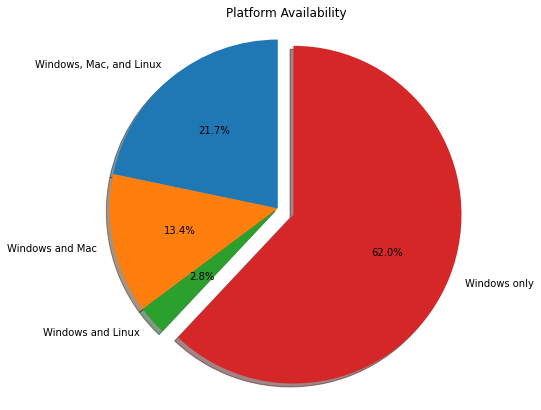

In [457]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes

mw = pd.DataFrame() #mac and windows compatable
lw = pd.DataFrame() #linux and windows compatable
mlw = pd.DataFrame() #mac, linux, and windows compatable
w = pd.DataFrame() #windows exclusive
plat_score = [] #platform score, discussed later
mac_count, linux_count, both_count, windows_count= 0,0,0,0
for index, row in master_df.iterrows():
    if row['mac'] and row['linux']:
        both_count+=1
        mlw = mlw.append(row)
        plat_score.append(4)
    elif row['mac']:
        mac_count+=1
        mw = mw.append(row)
        plat_score.append(2)
    elif row['linux']:
        linux_count+=1
        lw = lw.append(row)
        plat_score.append(3)
    else:
        windows_count+=1
        w = w.append(row)
        plat_score.append(1)
    
labels = 'Windows, Mac, and Linux', 'Windows and Mac', 'Windows and Linux', 'Windows only'
sizes = [both_count, mac_count, linux_count, windows_count]
explode = (0, 0, 0, 0.1) 

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Platform Availability')

plt.show()

From this sample of popular steam games, only 62.0% do not offer a windows version. Steam reports that only [3.37%](https://store.steampowered.com/hwsurvey/Steam-Hardware-Software-Survey-Welcome-to-Steam?platform=combined) of users are using MacOS. Perhaps the high rate of MacOS availability has to do with the popularity of these games. As of late, developers making a MacOS port of a game is seen as a selfless deed of fan service rather than something fans expect. Lets see how MacOS availability relates to game popularity.

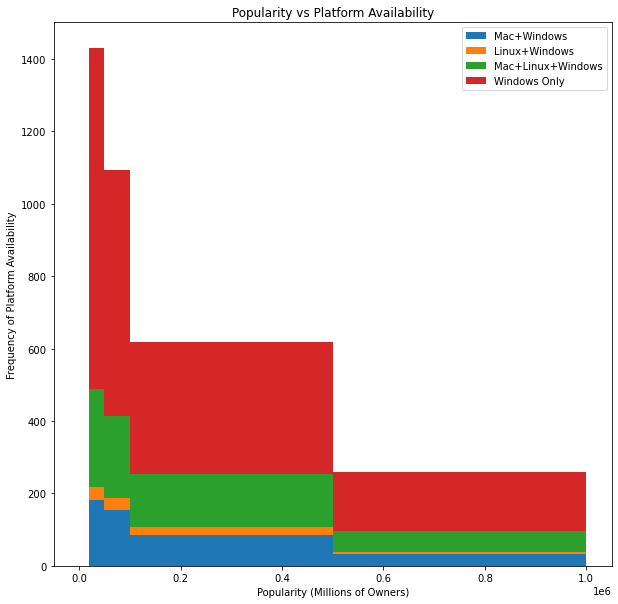

In [458]:
fig2, ax2 = plt.subplots(figsize=(10,10))
bins = [0,2000,5000,10000,20000,50000,100000,500000,1000000]
x = [mw['est_owners'].values, lw['est_owners'].values, mlw['est_owners'].values, w['est_owners'].values]
labels = ['Mac+Windows','Linux+Windows','Mac+Linux+Windows','Windows Only']
ax2.hist(x, bins = bins, density=False, histtype='bar', stacked=True, label=labels)
ax2.set_title('Popularity vs Platform Availability')
plt.legend()
plt.xlabel('Popularity (Millions of Owners)')
plt.ylabel('Frequency of Platform Availability')
plt.show()

This visualizaion does not show any glaring trends in regards to popularity vs platform availability. 

To better visualize this data, I am creating a DataFrame column called plat_score. This platform score is as follows:
1 = windows exclusive,
2 = windows + mac,
3 = linux + mac,
4 = linux + mac + windows
Using this, I can create a set of boxplots showing the distribution of the popularity of the sampled games by platform. Because the range of the popularity data is so great, I will set the x axis to be logarithmic in scale.

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


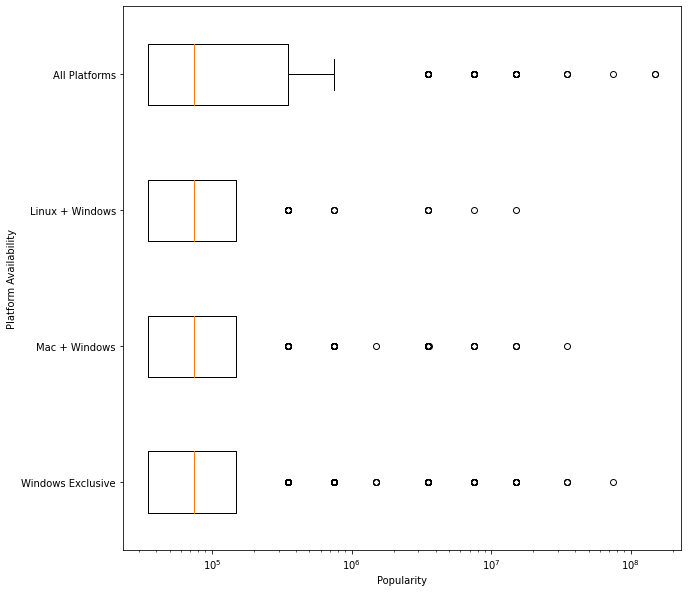

In [482]:
master_df['plat_score'] = plat_score
win_df = master_df[master_df['plat_score']==1]
macwin_df = master_df[master_df['plat_score']==2]
linwin_df = master_df[master_df['plat_score']==3]
maclinwin_df = master_df[master_df['plat_score']==4]
x = [win_df['est_owners'].values,macwin_df['est_owners'].values,
     linwin_df['est_owners'].values,maclinwin_df['est_owners'].values]
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.boxplot(x,notch=False,vert=False)
ax3.set_xscale('log')
ax3.set_yticklabels(labels=['Windows Exclusive', 'Mac + Windows', 'Linux + Windows', 'All Platforms'])
ax3.set_ylabel('Platform Availability')
ax3.set_xlabel('Popularity')
plt.show()

As seen in the above plot, games from this sample which are available on all platforms begin to slightly outperform their more limited counterparts in terms of popularity.

Next, I would like to explore if platform availability has been trending away from non-windows platforms over time.

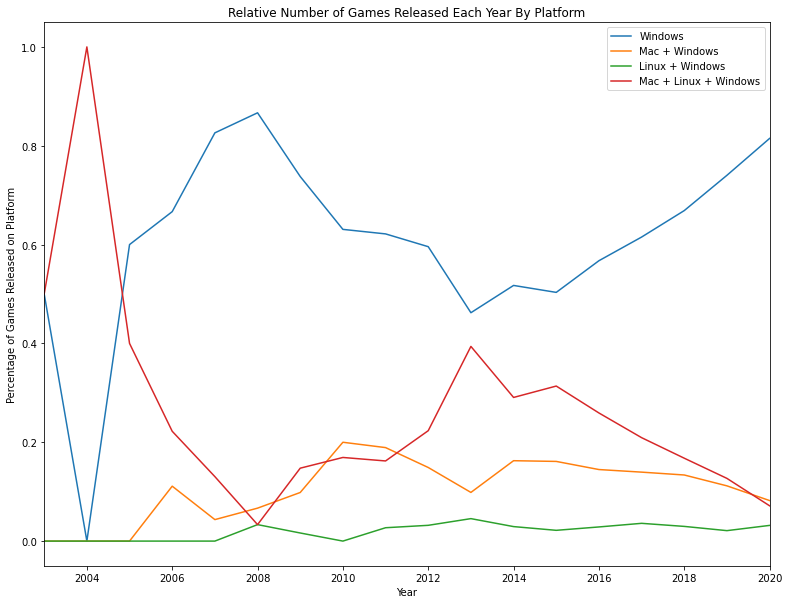

In [525]:
import matplotlib.dates 
years = []
for x in master_df['release_date']: #creating year of release column
    years.append(x.year)
master_df['years'] = years
win_df = master_df[master_df['plat_score']==1]
macwin_df = master_df[master_df['plat_score']==2]
linwin_df = master_df[master_df['plat_score']==3]
maclinwin_df = master_df[master_df['plat_score']==4]
x = np.sort(master_df['years'].unique()) # list of all years included in data
y_total = []
y_w, y_mw, y_mlw, y_lw = [], [], [], []
for v in x: #counting number of games released for each platform by year
    #weighting by total num games released that year
    weight_val = master_df['years'].values.tolist().count(v) 
    y_w.append(win_df['years'].values.tolist().count(v)/weight_val)
    y_mw.append(macwin_df['years'].values.tolist().count(v)/weight_val)
    y_lw.append(linwin_df['years'].values.tolist().count(v)/weight_val)
    y_mlw.append(maclinwin_df['years'].values.tolist().count(v)/weight_val)
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2003,2020)
plt.legend()
plt.show()

There is a clear visible trend towards Windows exclusivity over the past few years in terms of new game releases. Lets focus in on the past 7 years to see what is going on.

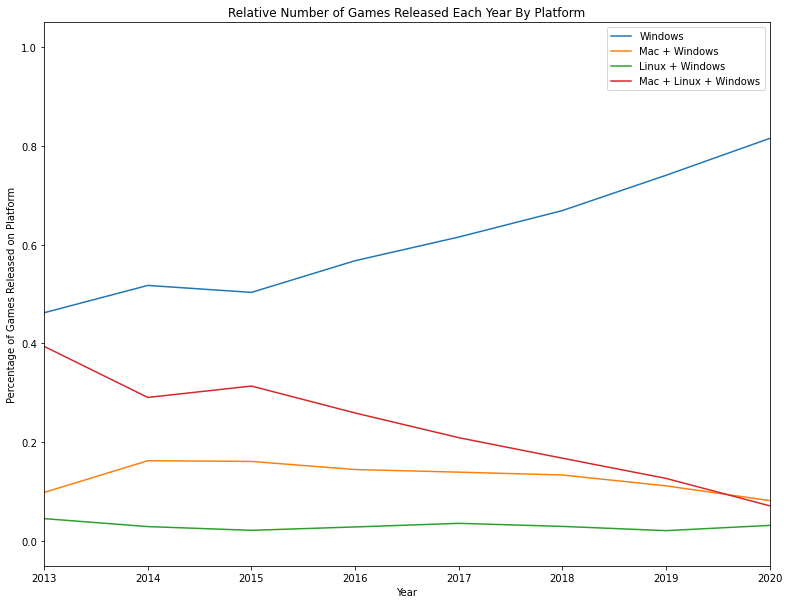

In [528]:
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2013,2020)
plt.legend()
plt.show()

There appears to be a linear downward trend over the past 7 years away from multiplatform releases on Steam. We can investigate further with a simple linear regressing using tools from scikit-learn.

In [565]:
import sklearn as sk
import sklearn.linear_model
from sklearn.model_selection import train_test_split
X = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X[-7:], y_mlw[-7:], test_size=0.2)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train,y_train)
print(regr.intercept_)
print(regr.coef_)

96.0122531096588
[-0.04749452]


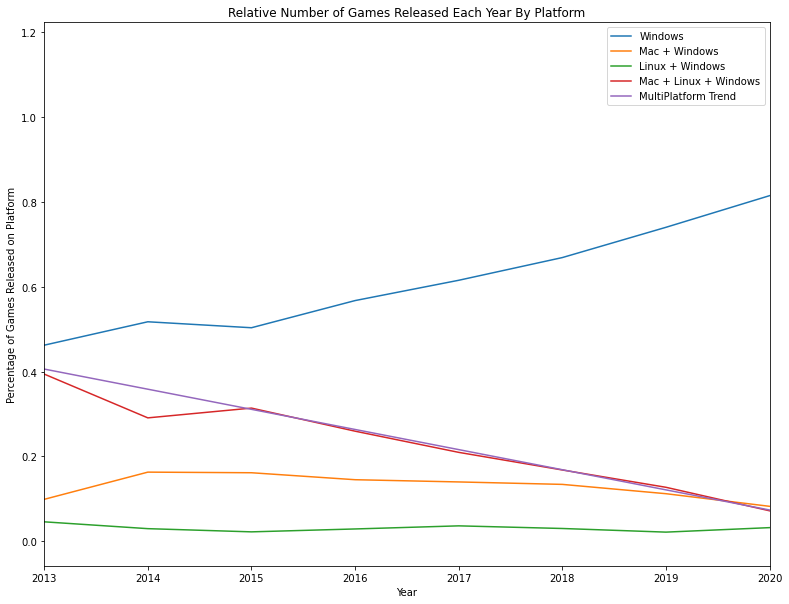

In [567]:
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.plot(x,regr.intercept_+x*regr.coef_, label = 'MultiPlatform Trend')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2013,2020)
plt.legend()
plt.show()

In [574]:
# model error testing
from sklearn import metrics
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03583625610872698
Mean Squared Error: 0.0022948931293167523
Root Mean Squared Error: 0.04790504283806406


All errors are very low. The trend for this data set is quite linear. Lets see what would happen if this trend were to continue for the next few years.

In [578]:
X_test = np.array([2020,2021,2022]).reshape(-1,1)
y_pred = regr.predict(X_test)
print(y_pred)

[ 0.07332663  0.02583211 -0.02166241]


If this trend were to continue as it is, multi-platform listings will be no more in within the next three years. 

## Insight

The trend over the past 7 years has been extremely linear for this dataset. Newly listed games are trending towards being exclusively Windows based. Sure, MacOS or Linux ports can be released years after a game's initial release, but incentive for developers is extremely low as the Steam user base is nearly all Windows users. As this goes on, Apple continues to invest in mobile gaming while divesting in PC gaming. There is no indication that multi-platform listings result in a significant amount of revenue when taking into account the time and money that goes in to porting a game to a different OS. Meanwhile, Microsoft is seeking to capatalize on the rise of PC gaming. Although they are not attempting to create a Steam-like game distribution platform, Microsoft is investing in Microsoft Game Pass for PC, a Netflix-like service where you pay montly for access to their selection of PC games. Sony is making a similar move with PS Now. As these companies prepare to ride the rising wave of PC gaming, Apple appears to be abandoning this market completely to fully invest in mobile gaming.